# Focos de Calor - Incêndios Florestais de 1998 - 2020

Base extraída do site de dados públicos do INPE: http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/

In [26]:
import numpy as np
import pandas as pd

import plotly.offline as py
import plotly.graph_objs as go

#Função para mostrar o gráfico no notebook
py.init_notebook_mode(connected=True)

In [27]:
from datetime import datetime

def transform_data (year, month):
    months = {
        'Janeiro' : '01',
        'Fevereiro' : '02',
        'Março': '03',
        'Abril': '04',
        'Maio': '05',
        'Junho': '06',
        'Julho': '07',
        'Agosto': '08',
        'Setembro': '09',
        'Outubro': '10',
        'Novembro': '11',
        'Dezembro': '12'
    }
    
    data = datetime.strptime(str(year) + '-' + months[month] + '-01', '%Y-%m-%d')
    
    return data

In [28]:
transform_data(2020, 'Janeiro')

datetime.datetime(2020, 1, 1, 0, 0)

In [29]:
archive = 'base_completa_foco_calor.csv'

base = pd.read_csv(archive)
#base['date'] = pd.to_datetime(base.date)
base

,year,number,month,state
0,1998,0,Janeiro,Acre
1,1999,0,Janeiro,Acre
2,2000,0,Janeiro,Acre
3,2001,0,Janeiro,Acre
4,2002,0,Janeiro,Acre
...,...,...,...,...
7759,2017,81,Dezembro,Tocantins
7760,2018,166,Dezembro,Tocantins
7761,2019,219,Dezembro,Tocantins
7762,2020,211,Dezembro,Tocantins


In [30]:
# Retirada dos dados de 2021
base = base[base['year'] < 2021]

In [32]:
base['data'] =  base.apply(lambda x: transform_data(x.year, x.month), axis=1)

<ipython-input-32-56ec78b67758>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
base['data']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
7758   2016-12-01
7759   2017-12-01
7760   2018-12-01
7761   2019-12-01
7762   2020-12-01
Name: data, Length: 7452, dtype: datetime64[ns]

In [49]:
base.tail(5)

,year,number,month,state,data
7758,2016,115,Dezembro,Tocantins,2016-12-01
7759,2017,81,Dezembro,Tocantins,2017-12-01
7760,2018,166,Dezembro,Tocantins,2018-12-01
7761,2019,219,Dezembro,Tocantins,2019-12-01
7762,2020,211,Dezembro,Tocantins,2020-12-01


In [50]:
# Informações sobre os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7452 entries, 0 to 7762
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    7452 non-null   int64         
 1   number  7452 non-null   int64         
 2   month   7452 non-null   object        
 3   state   7452 non-null   object        
 4   data    7452 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 349.3+ KB


In [51]:
base.describe()

,year,number
count,7452.000000,7452.000000
mean,2009.000000,681.952630
std,6.633695,1968.740691
min,1998.000000,0.000000
25%,2003.000000,12.000000
50%,2009.000000,76.000000
75%,2015.000000,395.250000
max,2020.000000,37231.000000


In [52]:
base['number'].max()

37231

In [57]:
# Função para Série Temporal

def plot_forest_fires_timeline(df, title_graph):
    
    dataTemp = df.groupby(['year']).agg({'number': 'sum'}).reset_index()
    
    dataTemp['3-years-SMA'] = dataTemp['number'].rolling(window=3).mean()
    
    graph = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    mode = 'markers+lines+text',
                    name = 'Focos de Calor',
                    textposition= 'top center'
                    )
    
    graph_sma = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['3-years-SMA'],
                    mode = 'markers+lines',
                    name = 'Média Móvel do Triênio'
                    )
    
    data = [graph, graph_sma]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Ano'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=450, 
                      width=1000,
                      legend=dict(
                        yanchor="top",
                        y= 0.95,
                        xanchor="right",
                        x=0.98,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)
    

In [58]:
plot_forest_fires_timeline(base, 'Série Temporal dos Focos de Calor')

In [59]:
# Função para Gráfico de Barras

def plot_forest_fires_state(df, title_graph, modeGraphBar):
    
    dataTemp = df.groupby(['state']).agg({'number': 'sum'}).sort_values(
        by=['state']).reset_index()
    
    if modeGraphBar:
        graph = go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    else:
        graph = go.Scatter(x = dataTemp['state'],
                    y = dataTemp['number'],
                    mode = 'markers',
                    marker=dict(
                        size=dataTemp['number']/100,
                        sizemode='area',
                        color='rgb(255, 65, 54)',
                        sizemin=4,
                        line_width=2
                        )
                    )    
    
    data = [graph]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [60]:
plot_forest_fires_state(base, 'Número de Focos de Calor por Estado', True)

In [61]:
# Função para Gráfico de Barras

def plot_forest_fires_month(df):
    
    dataTemp = df.groupby(['month']).agg({'number': 'sum'}).sort_values(
        by=['number'], ascending=False).reset_index()
    
    
    graph = go.Bar(x = dataTemp['month'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    
    
    data = [graph]

    layout = go.Layout(title = 'Número de Focos de Calor por Mês',
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=900)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [62]:
plot_forest_fires_month(base)

In [63]:
# Histograma dos focos de calor

def plot_histogram(df):

    graph = go.Histogram(x=df['number']) 

                          
    data = [graph]
    
    layout = go.Layout(title = 'Histograma dos Números de Focos de Calor',
                   xaxis = {'title': 'Distribuição'},
                   yaxis = {'title': 'Frequência'})
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [64]:
plot_histogram(base)

In [65]:
# Boxplot do número de focos de calor

def plot_box_plot(df):
    
    graph = go.Box(y = df[df['state'] == 'Mato Grosso']['number'],
                name = 'Mato Grosso')
    
    graph1 = go.Box(y = df[df['state'] == 'Pará']['number'],
                name = 'Pará')
    
    graph2 = go.Box(y = df[df['state'] == 'Maranhão']['number'],
                name = 'Maranhão')
    
    data = [graph, graph1, graph2]
    
    layout = go.Layout(title = 'BoxPlot dos Números de Focos de Calor',
                      height=600, 
                      width=1000)
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [66]:
plot_box_plot(base)

In [67]:
# Série Temporal dos Focos de Calor - Mato Grosso
base_temp = base.loc[base['state'] == 'Mato Grosso']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Mato Grosso')

In [68]:
# Série Temporal dos Focos de Calor - Pará
base_temp = base.loc[base['state'] == 'Pará']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Pará')

In [69]:
#Bubble Chart do Número de Focos de Calor por Estado - Setembro
base_temp = base.loc[base['month'] == 'Setembro']
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - Setembro', False)

In [70]:
# Função para Gráfico de Barras

def plot_forest_fires_state_max_month(df, months, title_graph):
    
    data = []
    
    for month in months:
        dataTemp = df[df['month'] == month].groupby(['state']).agg(
            {'number': 'sum'}).nlargest(3, 'number').reset_index()
    
    
        graph= go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto',
                    name = month
                    )
    
    
        data.append(graph)
        

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000,
                      legend=dict(
                        yanchor='top',
                        y=0.98,
                        xanchor='right',
                        x=0.99,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [71]:
# Gráfico de barras dos Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro
title = 'Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro'
plot_forest_fires_state_max_month(base, ['Agosto', 'Setembro', 'Outubro'], title )

In [72]:
#Bubble Chart do Número de Focos de Calor por Estado - 2020
base_temp = base.loc[base['year'] == 2020]
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - 2020', False)

## Time series decomposition Mato Grosso

In [103]:
base_MT = base[base['state'] == 'Mato Grosso']
base_MT.set_index('data', inplace = True)
base_MT

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Mato Grosso
1999-01-01,1999,39,Janeiro,Mato Grosso
2000-01-01,2000,44,Janeiro,Mato Grosso
2001-01-01,2001,44,Janeiro,Mato Grosso
2002-01-01,2002,172,Janeiro,Mato Grosso
...,...,...,...,...
2016-12-01,2016,399,Dezembro,Mato Grosso
2017-12-01,2017,249,Dezembro,Mato Grosso
2018-12-01,2018,471,Dezembro,Mato Grosso


In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,5)

In [105]:
result = seasonal_decompose(base_MT['number'].asfreq('MS'), model='additive')

<AxesSubplot:title={'center':'Trend'}, xlabel='data'>

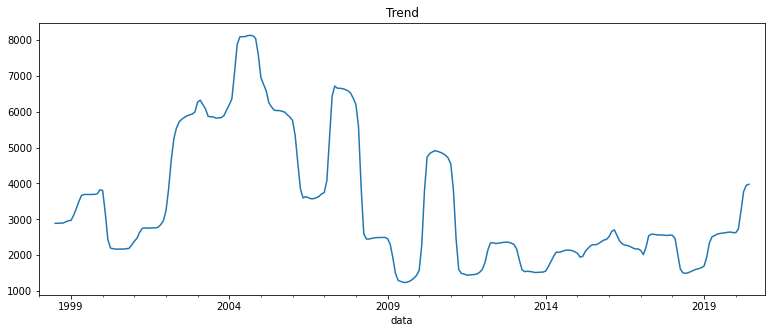

In [106]:
result.trend.plot(title='Trend')

<AxesSubplot:title={'center':'Seasonality'}, xlabel='data'>

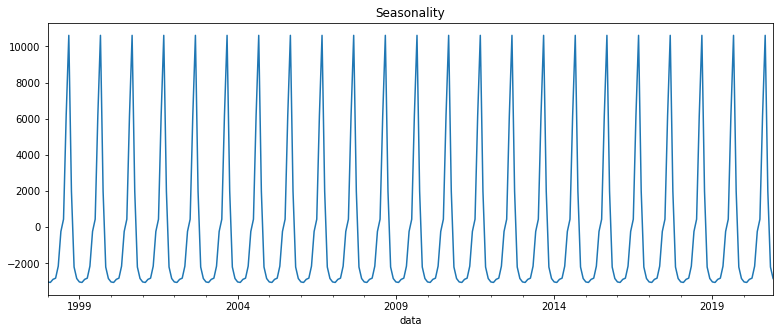

In [101]:
result.seasonal.plot(title='Seasonality')

<AxesSubplot:title={'center':'resid'}, xlabel='data'>

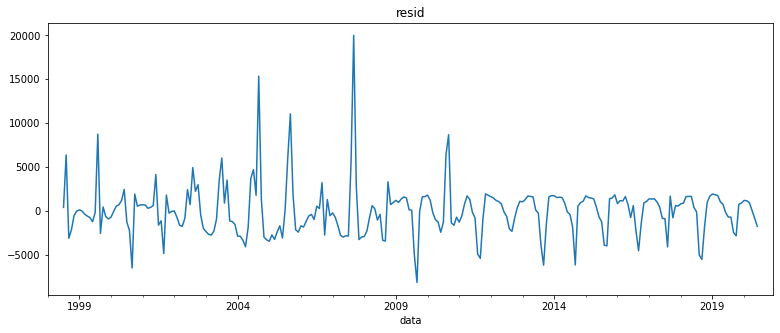

In [102]:
result.resid.plot(title='resid')